____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Elaborado por: Martin Palazzo__
____

# Clasificación en dataset Breast Cancer Wisconsin
En el siguiente notebook aplicaremos distintos clasificadores sobre un popular dataset de cancer de mamas. Analizaremos distintas formas de entrenar los modelos y utilizaremos distintos enfoques para evaluar los resultados y seleccionar los hiper-parametros.

Importar las librerias que venimos usando siempre.

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importamos librerias de scikit-learn

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Importamos dataset de Wisconsin Breast Cancer

In [3]:
pwd

'/Users/palazzom/Dropbox/clusterai/clases/2019/clase_03'

In [5]:
ls

2018/
clusterai2019_clase03_dataset_banknote_authentication.txt
clusterai_2019_clase03_clasificacion_diabetes_tarea.ipynb
clusterai_2019_clase03_clasificacion_iris.ipynb
clusterai_2019_clase03_clasificación_breast.ipynb
clusterai_2019_clase03_clasificación_ejercicio_banknotes.ipynb
clusterai_2019_clase03_dataset_Iris.csv*
clusterai_2019_clase03_dataset_breast_wisconsin.csv*
clusterai_2019_clase03_dataset_diabetes.csv
clusterai_2019_clase03_presentacion.pdf


In [6]:
breast = pd.read_csv('/Users/palazzom/Dropbox/clusterai/clases/2019/clase_03/clusterai_2019_clase03_dataset_breast_wisconsin.csv', delimiter=';')


Visualizamos el dataset. Observamos que en la columna "diagnosis" se encuentra si el tumor es benigno o maligno. El resto de las columnas refiere a distintas features del tumor. Ver que la primer columna es el ID del paciente, esta información no nos interesa!!

In [7]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
breast.shape

(569, 32)

# Reviso que no existan valores nulos en mi dataset

In [9]:
breast.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

# Separo mi variable independiente X

Vamos a guardar en una variable llamada "x" las features asociadas a cada muestra. Esta matriz contendra la informacion predictora del problema.

Inicialmente vamos a crear "x" solamente utilizando las features desde la columna 2 a la 4 (ojo que python no lee el 5).

In [10]:
x = breast.iloc[:,2:5]

In [11]:
x.head()

,radius_mean,texture_mean,perimeter_mean
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10


Con un Pairplot vamos a visualizar como se relacionan par-a-par las variables seleccionadas a lo largo de todo el dataset.

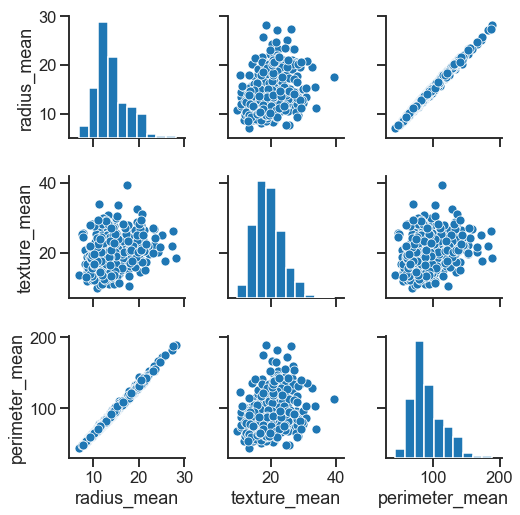

In [12]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")

sns.pairplot(x)
plt.show()

# Separo mi variable dependiente Y

Ahora procederemos a crear el vector de etiquetas con las variables dependientes. Ver que las etiquetas se encuentran en la 2da columna (es decir la columna 0) del dataset.

In [13]:
y = breast.iloc[:,1]

In [14]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

## Transformo mi variable dependiente Y en numerica (previamente estaba como string)
vemos que las etiquetas se encuentran asignadas con M y B. Para transformarlas a numéricas utilizaremos el "LabelEncoder" de sklearn y las pasaremos a numeros.

In [15]:
from sklearn import preprocessing
# "le" es el label encoder que transforma las etiquetas de string a INT.
le = preprocessing.LabelEncoder()
# sobre-escribo el vector "y" con las etiquetas numericas obtenidas del label encoder
y=le.fit_transform(y)

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Separo mi dataset en Train y Test
Con la funcion "train_test_split" de sklearn separaremos nuestro dataset (tanto x como y) en dos sets de entrenamiento y prueba independiente. Podemos elegir que % de muestras esten en cada conjunto. El random_state sirve para que pueda reproducirse la "aleatoriedad" de division de muestras en el futuro. 

In [64]:
# obtenemos xtrain, xtest, ytrain e ytest :) 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.9, random_state=4)

In [65]:
# observamos como queda la matriz de xtrain
xtrain.shape

(56, 3)

In [66]:
# observamos como queda la matriz de xtest
xtest.shape

(513, 3)

## Auto-Scaling utilizando muestras de train 
Queremos dejar todas las features en los mismos rangos por eso utilizaremos el standard scaler para que queden con media 0 y desvio standard 1.

In [67]:
# auto scaling train- set (mean = 0, std = 1)
# ver que en la misma linea creamos el standard scaler y lo "fiteamos" al mismo tiempo con "xtrain"
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
# xtrain_scal tendra el dataset de train pre-procesado con el standard scaler
xtrain_scal = scaler.transform(xtrain)  
# para cada feature imprimimos la media y el desvio standard obtenido. Ver que media = 0 y stdev = 1.
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[ 3.17206578e-17  3.40997072e-16 -1.26882631e-16]
[1. 1. 1.]


In [69]:
# utilizando el scaler "fiteado" o "ajustado" a los datos de train, aplicamos el scaler a los datos de test.
# obtenemos "xtest_scal" 
xtest_scal = scaler.transform(xtest)  
# obviamente la media y stdev de las features en test no seran 0 y 1 ya que el scaler se ajusto con train unicamente.
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[-0.12327188  0.01294419 -0.1267567 ]
[0.91689085 0.96477761 0.90315813]


## Entrenar modelo KNN

Defino modelo KNN

In [76]:
# defino modelo KNN llamado "neigh" y le asigno el hiper-parametro n_neighbors = 5 
# (OJO! no estamos haciendo grid-search)
neigh = KNeighborsClassifier(n_neighbors=5)

Ajusto-entreno (fiteo) modelo a los datos de train. OJO! aca no estamos usando cross-validation. Vamos a estimar los hiper-parametros a mano.

In [77]:
# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
neigh.fit(xtrain_scal, ytrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Hago prediccion de los datos de test (sin utilizar las etiquetas).

In [78]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = neigh.predict(xtest_scal)

In [79]:
ypred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,

Computo la exactitud de mi modelo entre las etiquetas de test reales y las asignadas por el modelo.

In [80]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8713450292397661


Computamos el Area debajo de la curva ROC del modelo.

In [81]:
#compute and plot AUC
yproba = neigh.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.9217780390619896


Imprimimos el AUC ROC

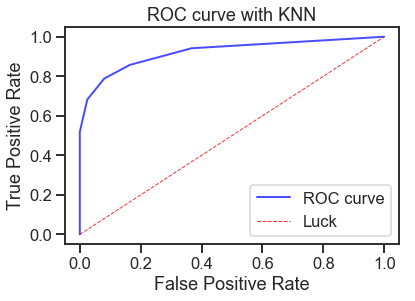

In [82]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

Calculamos la matriz de confusión.

In [83]:
# Compute confusion Matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[298,  26],
       [ 40, 149]])

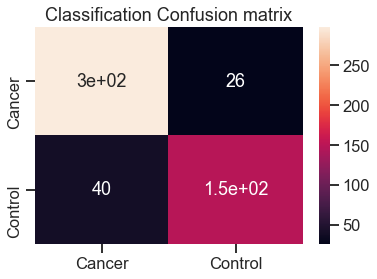

In [84]:
df_cm = pd.DataFrame(cm, index = ['Cancer', 'Control'], columns = ['Cancer', 'Control'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

## Hacemos una comparacion con KNN variando el valor de K vecinos
¿que sucede si probamos distintos valores de K? ¿como se modificara el accuracy?

In [32]:
# indicamos la cantidad de valores que queremos probar y lo guardamos en "iteraciones_knn"
iteraciones_knn = 50
# creo un vector de 50 posiciones para guardar los resultados de accuracy.
acc_knn = np.zeros(iteraciones_knn)

In [33]:
# hago un for loop para ir entrenando un clasificador en cada iteracion e ir probando distintos valores de k
for r in range(0,iteraciones_knn):
    # entreno un KNN classifier con "k=r+1"
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scal,ytrain)
    # calculo la prediccion
    ypred_knn = neigh.predict(xtest_scal)
    # guardo el resultado de prediccion en la posicion r del vector "acc_knn"
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

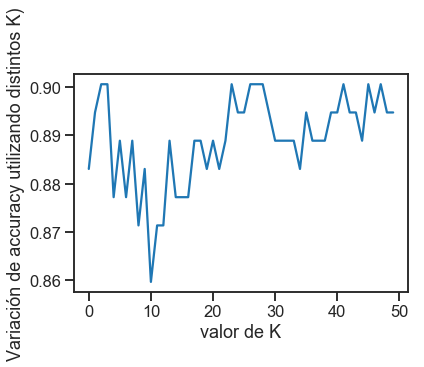

In [34]:
# imprimimos en pantalla el accuracy para cada valor de K
# vemos que con un valor de 5 obtenemos 0.9 de accuracy.
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
plt.show()

# Tarea 01: 
- crear un nuevo set de xtrain y xtest utilizando todas las features posibles ya que antes solo habiamos usado un sub-conjunto de las mismas(y asi tener mejor poder de prediccion :)
- Deberan nombrarlas con otro nombre distinto al creado anteriormente y luego comparar resultados de AUC ROC y Accuracy.
- utilizar 70% de train y 30% test.

In [35]:
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############

Ahora deberan usar cross validation para encontrar el mejor hiper-parametro. La funcion GridSearchCV de scikit learn puede realizar la busque de hiper-parametros y la validacion cruzada en una sola linea de codigo. Una vez que definen la funcion GridSearchCV y la guardan como 'clf' utilizaran 'clf' para hacer .fit() y .predict() .

In [36]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,5, 10,20, 50], }
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid = parameters, refit = True, cv = 5)

In [ ]:
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############

Calcular accuracy y AUC-ROC con el nuevo clasificador con gridsearchCV.

In [ ]:
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############

# Tarea 02: 
- Un SVM con grid search y cross validation cv = 5 utilizando el dataset con todas las features realizado en el punto anterior. 
- Comparar resultados de clasificación entre ambos modelos.
- determinar que parametros son los "ganadores" del grid search para cada modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC()
clf_svm = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)

In [ ]:
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############

# Tarea 03:
- Entrenar un modelo de logistic regression sobre los datos del punto 01 aplicando cross validation.
- comparar los resultados con el KNN y el SVM.

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[1, 10, 100, 1000]}
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
clf_lr = GridSearchCV(lr_model, param_grid = parameters, refit = True, cv = 5)

In [ ]:
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############
######### CODIGO AQUI ############